In [1]:
# Importing libaries 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

# scaling and train test split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2]:
# Reading dataset
dataset=pd.read_csv('/content/drive/MyDrive/Data Science/Machstatz/trainingData (1).csv')
dataset.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


**Understanding the Data**

In this section,will look at the structure of the dataset. Firstly, will check the features present in our data and then will look at their data types.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa



*   20 independent variables and 1 target variable, i.e. Loan_amount in the dataset.
*   We will predict the Loan_amount using the model built using the dataset.



In [4]:
# checking the null values
# calculating the % of missing data for each features

missing_features=dataset.isnull().mean().sort_values(ascending=False)
missing_features.head(11)

social_class             0.131375
water_availabity         0.131325
secondary_business       0.131025
city                     0.046600
type_of_house            0.017350
home_ownership           0.009475
sanitary_availability    0.005200
monthly_expenses         0.003000
loan_purpose             0.000650
primary_business         0.000650
loan_amount              0.000000
dtype: float64

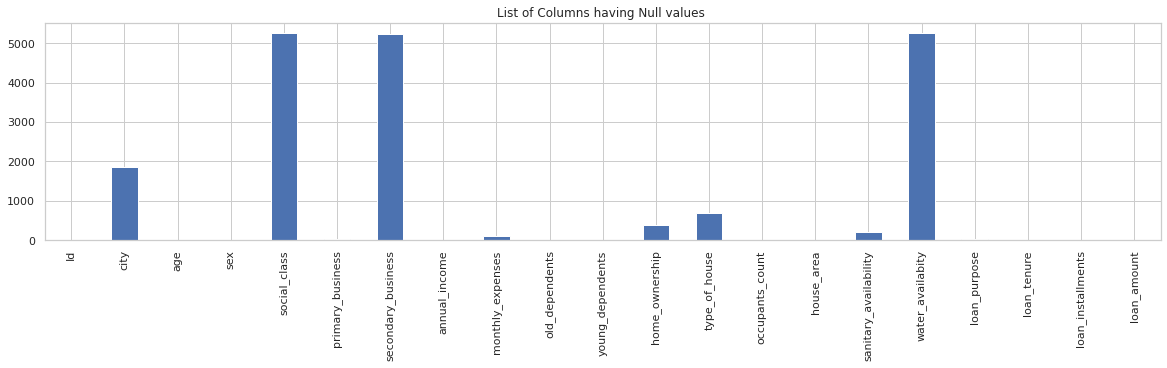

In [5]:
NA_col = dataset.isnull().sum()
# NA_col = NA_col[NA_col.values]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns having Null values ')
plt.show()

From the above histogram,So we can see from the above plot that there are 10 columns in the dataset where all the values are NA.

**Pre-processing and  descriptive  Analysis**

*   Drop the feature if it is not useful for predicting the loan amount.
*   View summary statistics and visualize the data, plotting against the loan amount.
*   Modify the feature to make it useful for modeling, if necessary.








In [6]:
# ID
dataset['Id'].value_counts(dropna=False)

2047     1
34106    1
32069    1
30020    1
19779    1
        ..
19100    1
29339    1
31386    1
25241    1
2049     1
Name: Id, Length: 40000, dtype: int64

they are all unique. The Id is not useful for modeling, either as a categorical variable (there are too many distinct values) or as a numerical variable (the IDs vary wildly in magnitude, likely without any significance),droping this variable.

In [7]:
dataset.drop('Id', axis=1, inplace=True)

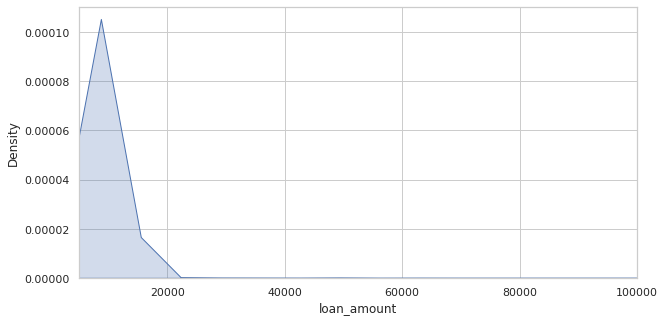

In [8]:
#lOAN AMOUNT

plt.figure(figsize=(10,5))
plt.xlim(5000,100000)
sns.kdeplot(dataset['loan_amount'],shade=True)
plt.show()

In [9]:
dataset["loan_amount"].describe()

count    4.000000e+04
mean     8.412593e+03
std      1.359694e+04
min      1.000000e+02
25%      5.000000e+03
50%      8.000000e+03
75%      1.000000e+04
max      1.343000e+06
Name: loan_amount, dtype: float64

Insights:Most of the loan amounts are distributed between 5000 to 1340000, with a median of 8000

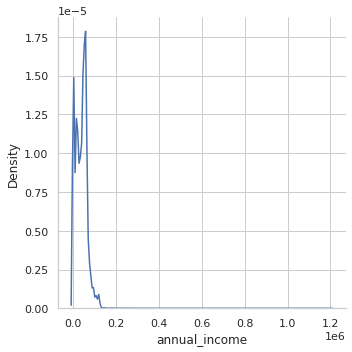

In [10]:
# ANNUAL INCOME

sns.displot(dataset, x="annual_income", kind="kde",bw_adjust=0.95)

In [11]:
dataset['log_annual_inc'] = dataset['annual_income'].apply(lambda x: np.log10(x+1))

In [12]:
dataset['log_annual_inc'].describe()

count    40000.000000
mean         3.913580
std          1.617809
min          0.000000
25%          4.158393
50%          4.556315
75%          4.748196
max          6.079182
Name: log_annual_inc, dtype: float64


*   Max value is 1200000 which is approx 30 times more than mean value,
*   Most of the applicants earns beteen 40000 to 70000 annually.





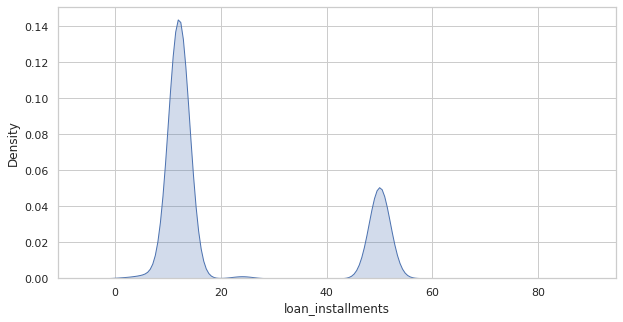

In [13]:
# LOAN INSTALLMENTS

plt.figure(figsize=(10,5))
sns.kdeplot(dataset['loan_installments'],shade=True)
plt.show()

Insights:Most of the customer's taken loan installmets beteen 12 and 50 months

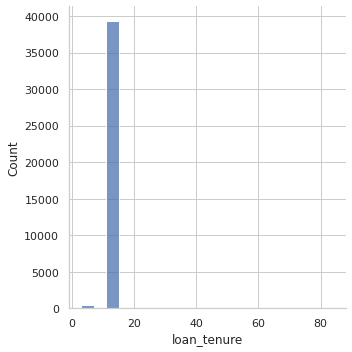

In [14]:
# LOAN TENURE

sns.displot(dataset, x="loan_tenure", bins=20)

Insights:Most of the applicants( approx 96%) taken loan tenure length  as 12 months, and also this features is having constant values, will remove this feature in feature selection

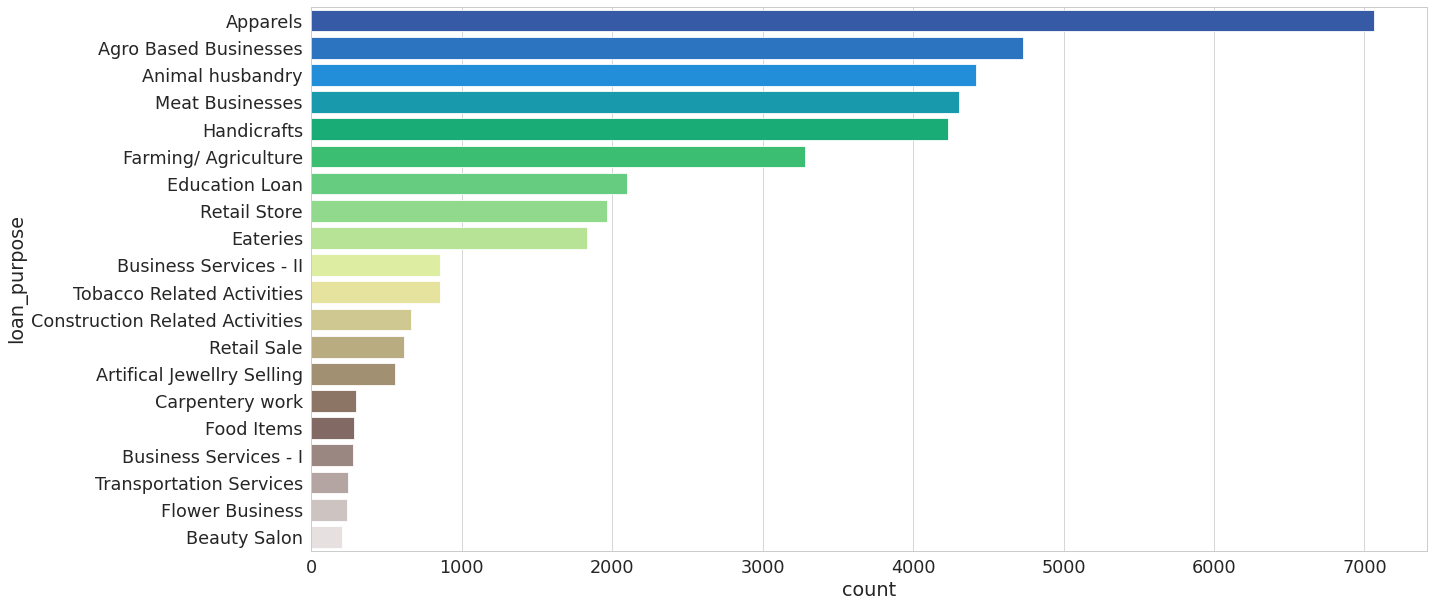

In [15]:
# LOAN PURPOSE

plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale = 2)
sns.countplot(y='loan_purpose', data=dataset, palette="terrain", order=dataset['loan_purpose'].value_counts().index[:20])
# plt.title("Top Cases registered")
sns.set_style("darkgrid")
plt.show()

Insights: Approx 60% of the applicants applied loan for their business motive.
filling the missing values with mode

In [16]:
dataset['loan_purpose'].fillna('Apparels',inplace=True)

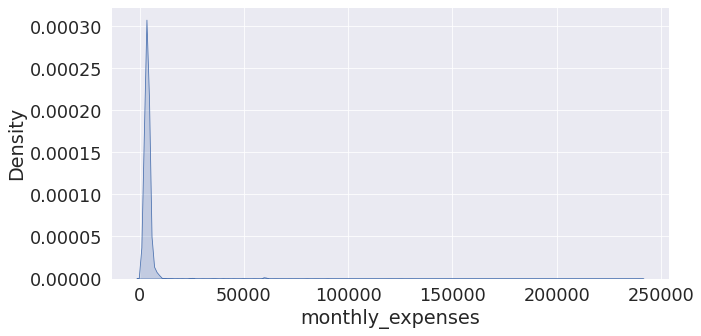

In [17]:
# MONTHLY EXPENSES

plt.figure(figsize=(10,5))
sns.kdeplot(dataset['monthly_expenses'],shade=True)
plt.show()

In [18]:
dataset['monthly_expenses'].describe()

count     39880.000000
mean       3810.875401
std        4592.958009
min           2.000000
25%        2500.000000
50%        3500.000000
75%        4000.000000
max      240000.000000
Name: monthly_expenses, dtype: float64

Insights: Approx monthly expenses lies between 1000 to 4000 of the applicants applied loan for their other business motive.

In [19]:
dataset['monthly_expenses'] = dataset['monthly_expenses'].fillna( dataset['monthly_expenses'].dropna().mean())

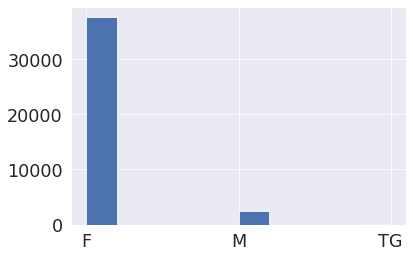

In [20]:
# SEX

dataset['sex'].hist(bins=10)

Insights:Feamle has more number of customer's as compared to male

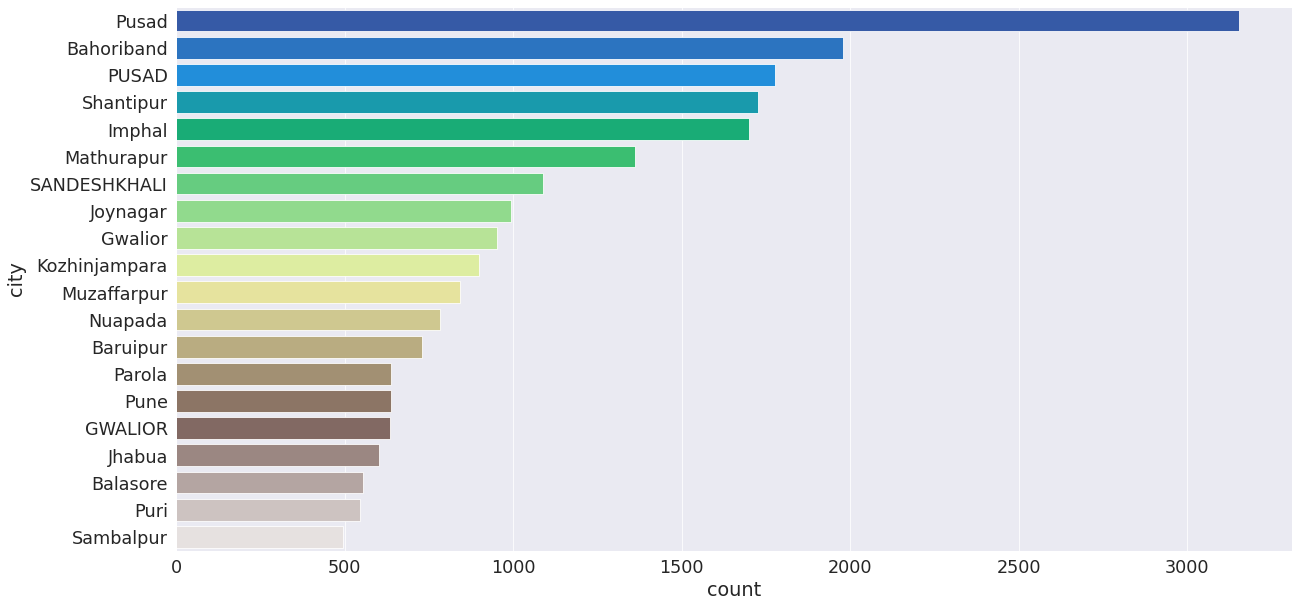

In [21]:
# CITY

plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale = 2)
sns.countplot(y='city', data=dataset, palette="terrain", order=dataset['city'].value_counts().index[:20])
# plt.title("Top Cases registered")
sns.set_style("darkgrid")
plt.show()

Insights: Pusad city as highest number of applicates as compared to other city, city like Bahoriband,Shantipur are approx same number of applicates

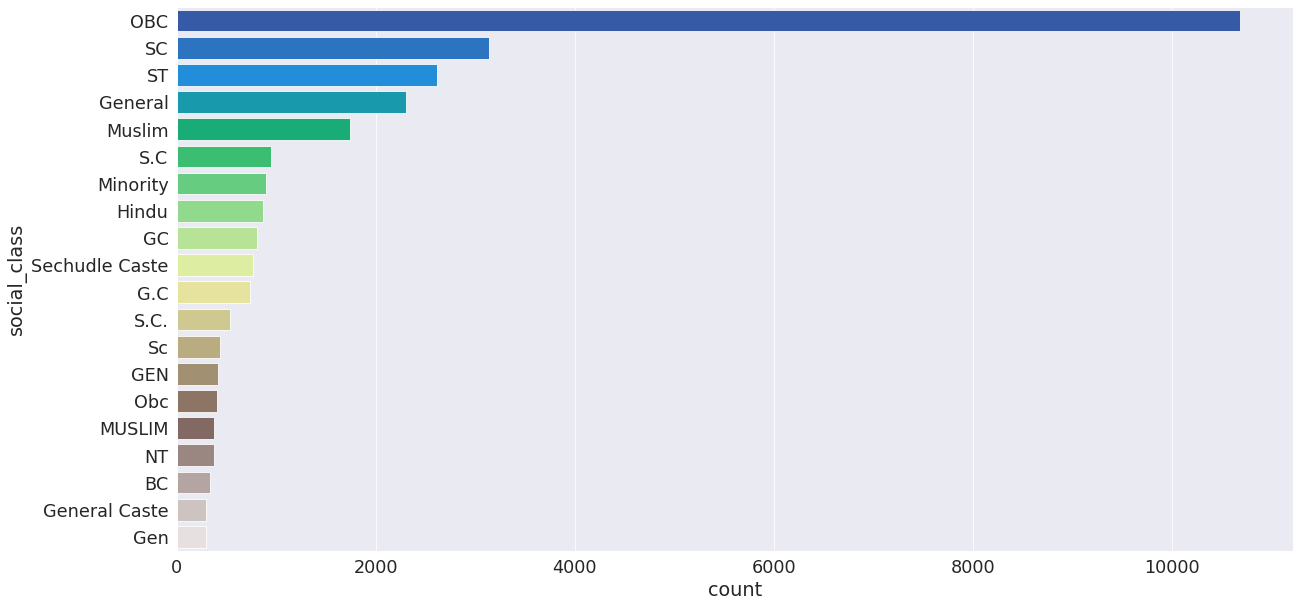

In [22]:
# SOCIAL CLASS

plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale = 2)
sns.countplot(y='social_class', data=dataset, palette="terrain", order=dataset['social_class'].value_counts().index[:20])
# plt.title("Top Cases registered")
sns.set_style("darkgrid")
plt.show()

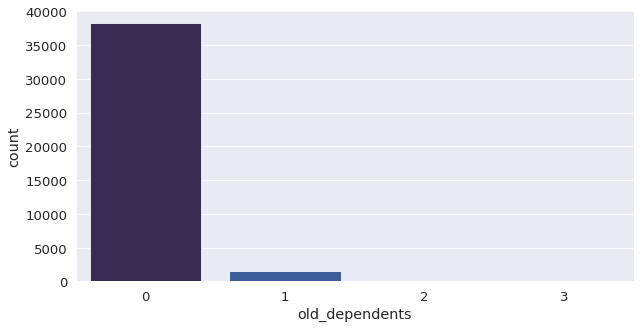

In [23]:
# OLD DEPENDENTS

plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale = 1.5)
sns.countplot(x='old_dependents',data=dataset, palette = "mako",  saturation=0.9)
sns.set_style("ticks")

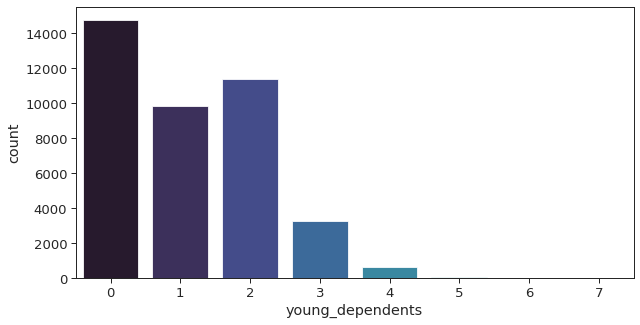

In [24]:
# young_dependents

plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale = 1.5)
sns.countplot(x='young_dependents',data=dataset, palette = "mako",  saturation=0.9)
sns.set_style("ticks")

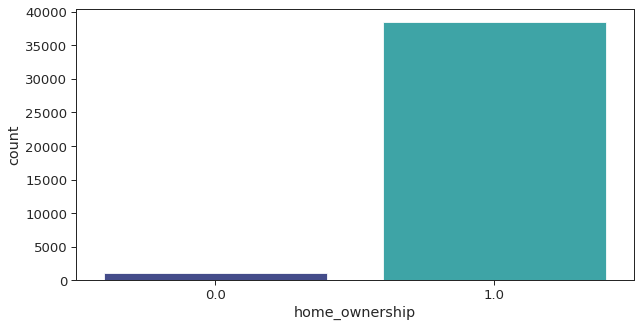

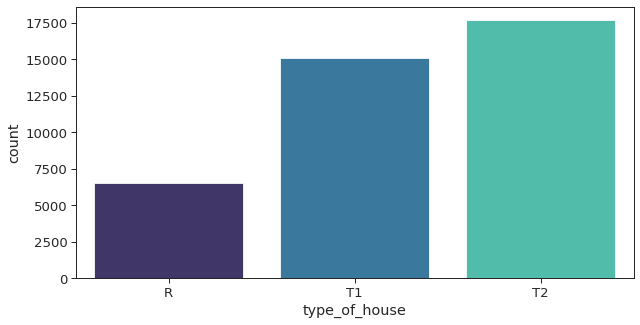

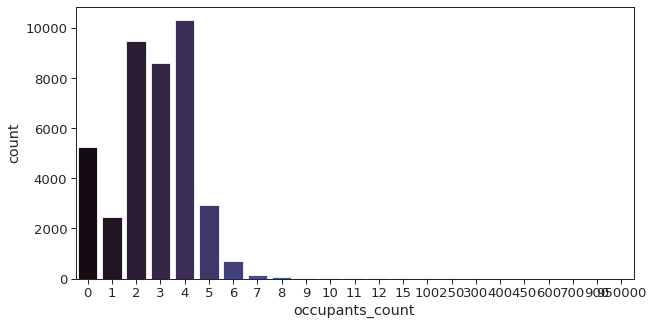

In [25]:
# home_ownership

plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale = 1.5)
sns.countplot(x='home_ownership',data=dataset, palette = "mako",  saturation=0.9)
sns.set_style("ticks")

# type_of_house

plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale = 1.5)
sns.countplot(x='type_of_house',data=dataset, palette = "mako",  saturation=0.9)
sns.set_style("ticks")

# occupants_count

plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale = 1.5)
sns.countplot(x='occupants_count',data=dataset, palette = "mako",  saturation=0.9)
sns.set_style("ticks")

In [26]:
# Filling the missing values 
dataset['home_ownership'] = dataset['home_ownership'].fillna( dataset['home_ownership'].dropna().mean())

In [27]:
dataset.drop('type_of_house', axis=1, inplace=True)

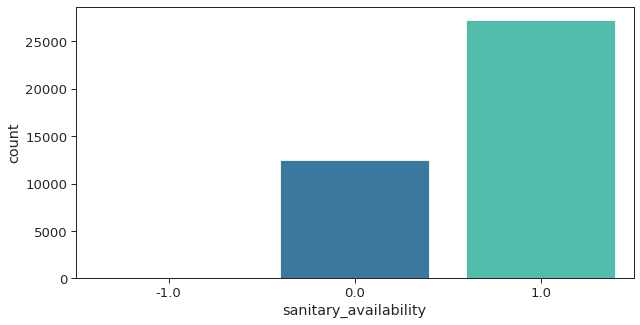

In [28]:
# sanitary_availability
plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale = 1.5)
sns.countplot(x='sanitary_availability',data=dataset, palette = "mako",  saturation=0.9)
sns.set_style("ticks")

In [29]:
dataset['sanitary_availability'] = dataset['sanitary_availability'].fillna( dataset['sanitary_availability'].dropna().mean())

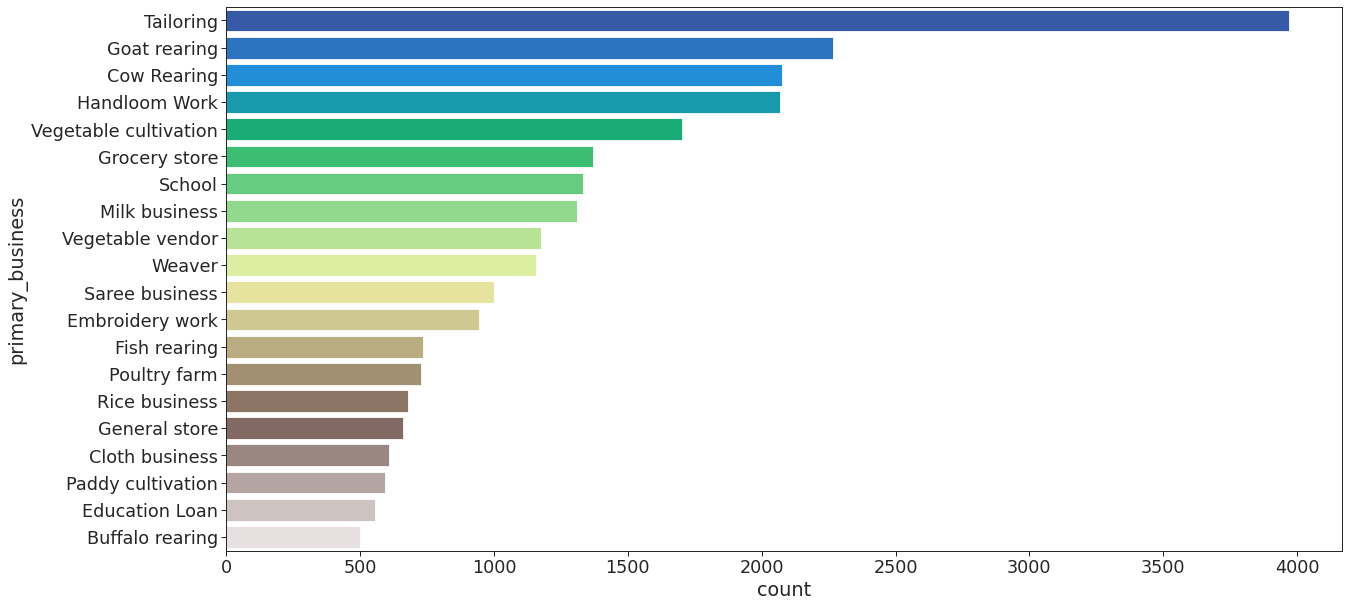

In [30]:
# primary_business

plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale = 2)
sns.countplot(y='primary_business', data=dataset, palette="terrain", order=dataset['primary_business'].value_counts().index[:20])
# plt.title("Top Cases registered")
sns.set_style("darkgrid")
plt.show()

In [31]:

dataset['primary_business'].fillna('Tailoring',inplace=True)

In [32]:
# secondary_business

dataset['secondary_business'].value_counts(dropna=False)

none                   27366
NaN                     5241
Others                  2564
Daily wage labourer     2545
Agriculture             2105
Livestock rearing        179
Name: secondary_business, dtype: int64


There are different secondary business in the dataset,the primary business variable appears to already contain this information. droping the secondary business variable.

In [33]:
dataset.drop('secondary_business', axis=1, inplace=True)

Correlation Matrix : All Continuos(Numeric) Variables


In [34]:
dataset_correlation = dataset.corr()
dataset_correlation

,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount,log_annual_inc
age,1.000000,-0.006414,-0.003101,-0.000691,-0.005837,0.000937,-0.000031,-0.000586,-0.007487,-0.001627,-0.000233,-0.003040,-0.001969,-0.012003
annual_income,-0.006414,1.000000,0.112208,0.062216,0.239864,0.011787,0.003999,0.033902,0.240424,0.280939,-0.027618,-0.119936,0.085632,0.643794
monthly_expenses,-0.003101,0.112208,1.000000,-0.003521,0.028705,-0.047089,0.001320,-0.008270,0.059790,0.078061,-0.013020,0.113830,0.019568,0.044451
old_dependents,-0.000691,0.062216,-0.003521,1.000000,-0.093778,0.008584,-0.000987,0.010852,0.029024,-0.017931,-0.022390,-0.033921,0.006997,0.081553
young_dependents,-0.005837,0.239864,0.028705,-0.093778,1.000000,0.025070,0.004192,0.017877,0.226778,-0.025687,-0.015778,-0.064783,0.006200,0.386194
home_ownership,0.000937,0.011787,-0.047089,0.008584,0.025070,1.000000,0.000867,0.009548,0.040630,0.018611,-0.097764,0.021137,0.001938,0.072147
occupants_count,-0.000031,0.003999,0.001320,-0.000987,0.004192,0.000867,1.000000,-0.000263,0.003550,0.005204,-0.000133,-0.002887,-0.000125,0.002889
house_area,-0.000586,0.033902,-0.008270,0.010852,0.017877,0.009548,-0.000263,1.000000,0.040753,0.001440,0.001177,-0.027506,0.002874,0.046707
sanitary_availability,-0.007487,0.240424,0.059790,0.029024,0.226778,0.040630,0.003550,0.040753,1.000000,0.141974,0.007674,0.175091,0.042233,0.497669
water_availabity,-0.001627,0.280939,0.078061,-0.017931,-0.025687,0.018611,0.005204,0.001440,0.141974,1.000000,0.028159,-0.079684,0.079910,0.232143


HeatMap: All continuos variables

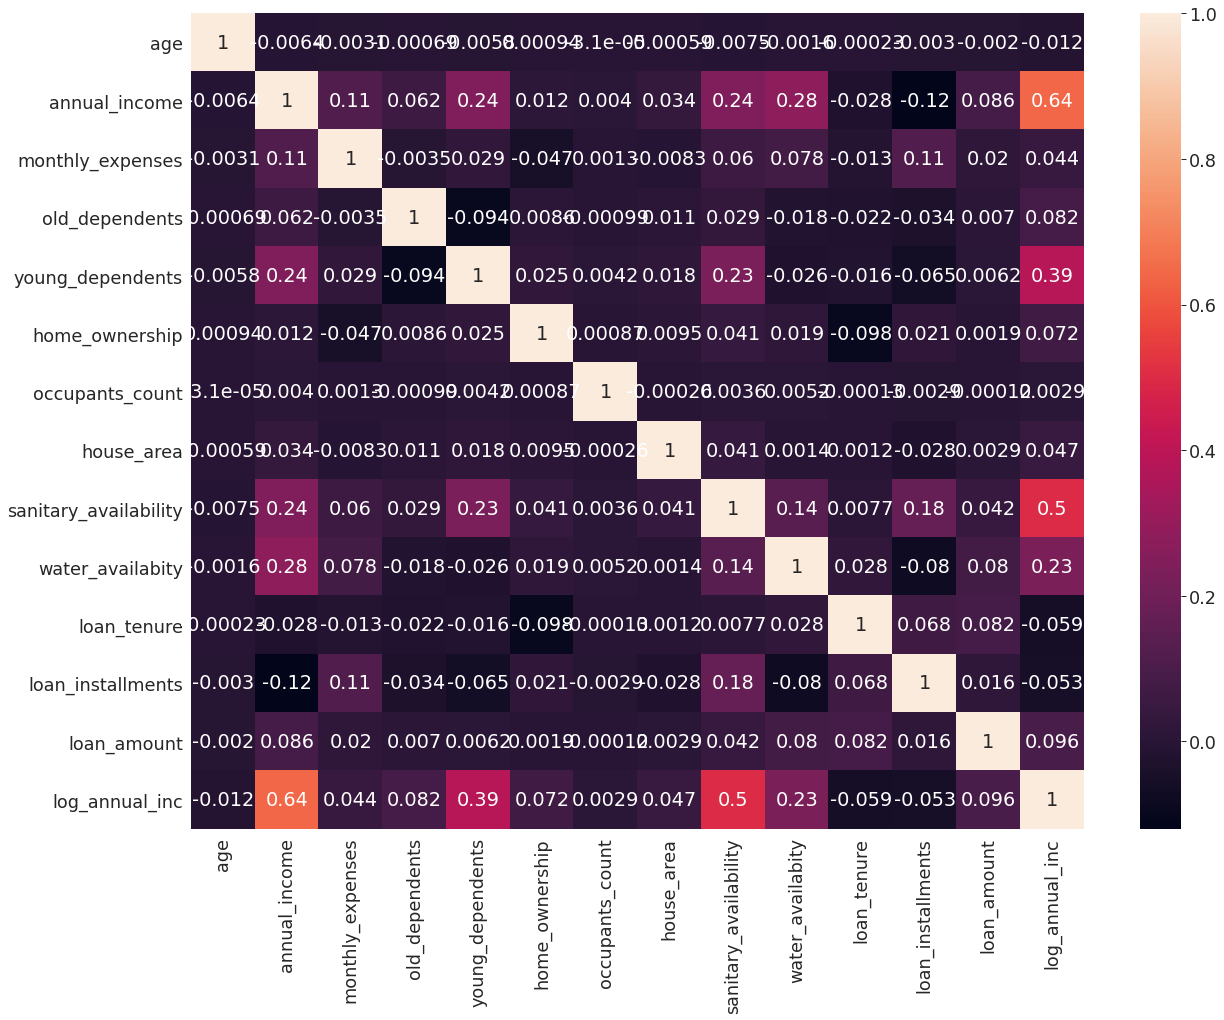

In [35]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(dataset_correlation, 
            xticklabels=dataset_correlation.columns.values,
            yticklabels=dataset_correlation.columns.values,annot= True)
plt.show()

Remove irrelevant columns.

Till now  have removed the columns based on the count & statistics. Now  look at each column from business perspective if that is required or not for our analysis such as Unique ID's, city, social class, 

In [36]:
dataset.drop('social_class',axis=1,inplace=True)
dataset.drop('city', axis=1, inplace=True)
dataset.drop('water_availabity', axis=1, inplace=True)

In [37]:
dataset.head()

,age,sex,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,loan_purpose,loan_tenure,loan_installments,loan_amount,log_annual_inc
0,22,F,Tailoring,36000.0,5000.0,0,2,1.0,4,70.0,1.0,Apparels,12,12,5000.0,4.556315
1,21,F,Tailoring,94000.0,3600.0,1,1,1.0,4,80.0,1.0,Apparels,12,50,7500.0,4.973132
2,24,M,Beauty salon,48000.0,4000.0,0,2,1.0,4,50.0,1.0,Beauty Salon,12,12,5000.0,4.681250
3,26,F,Tailoring,7000.0,5000.0,0,2,1.0,5,50.0,1.0,Apparels,12,50,7500.0,3.845160
4,23,F,General store,36000.0,3500.0,0,0,1.0,1,112.0,1.0,Retail Store,12,12,5000.0,4.556315


In [38]:
dataset.isnull().sum()

age                      0
sex                      0
primary_business         0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
occupants_count          0
house_area               0
sanitary_availability    0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
log_annual_inc           0
dtype: int64

**Label Encoding**

It converts categorical text data into model-understandable numerical data,use the Label Encoder class. For label encoding, import the LabelEncoder class from the sklearn library, then fit and transform your data.

In [39]:
objList = dataset.select_dtypes(include = "object").columns
print (objList)

Index(['sex', 'primary_business', 'loan_purpose'], dtype='object')


In [40]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dataset[feat] = le.fit_transform(dataset[feat].astype(str))

In [41]:
dataset.head()

,age,sex,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,loan_purpose,loan_tenure,loan_installments,loan_amount,log_annual_inc
0,22,0,370,36000.0,5000.0,0,2,1.0,4,70.0,1.0,3,12,12,5000.0,4.556315
1,21,0,370,94000.0,3600.0,1,1,1.0,4,80.0,1.0,3,12,50,7500.0,4.973132
2,24,1,30,48000.0,4000.0,0,2,1.0,4,50.0,1.0,5,12,12,5000.0,4.681250
3,26,0,370,7000.0,5000.0,0,2,1.0,5,50.0,1.0,3,12,50,7500.0,3.845160
4,23,0,168,36000.0,3500.0,0,0,1.0,1,112.0,1.0,28,12,12,5000.0,4.556315


In [42]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [43]:
A = dataset['loan_amount'] 
B = dataset[['age', 'sex', 'primary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership',
       'occupants_count', 'house_area', 'sanitary_availability',
       'loan_purpose', 'loan_tenure', 'loan_installments','log_annual_inc']] 
model = sm.OLS(A,B).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            loan_amount   R-squared (uncentered):                   0.290
Model:                            OLS   Adj. R-squared (uncentered):              0.290
Method:                 Least Squares   F-statistic:                              1089.
Date:                Sun, 27 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:26:11   Log-Likelihood:                     -4.3709e+05
No. Observations:               40000   AIC:                                  8.742e+05
Df Residuals:                   39985   BIC:                                  8.743e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                      -0.0032      0.018     -0.181      0.856      -0.038       0.031
sex                    -263.1090    290.138     -0.907      0.364    -831.786     305.568
primary_business         -0.6871      0.549     -1.251      0.211      -1.764       0.390
annual_income             0.0184      0.003      5.890      0.000       0.012       0.025
monthly_expenses          0.0253      0.015      1.699      0.089      -0.004       0.055
old_dependents         -235.4492    309.046     -0.762      0.446    -841.186     370.287
young_dependents       -464.3997     68.966     -6.734      0.000    -599.575    -329.224
home_ownership        -1433.8789    345.749     -4.147      0.000   -2111.556    -756.202
occupants_count          -0.0009      0.014     -0.063      0.950      -0.029       0.027
house_area               -0.0031      0.015     -0.210      0.833      -0.032       0.026
sanitary_availability  -273.1745    174.789     -1.563      0.118    -615.764      69.415
loan_purpose             -9.5287      7.503     -1.270      0.204     -24.234       5.177
loan_tenure             575.2340     30.163     19.071      0.000     516.114     634.354
loan_installments        12.5566      4.268      2.942      0.003       4.191      20.922
log_annual_inc          734.4293     63.610     11.546      0.000     609.752     859.107
==============================================================================
Omnibus:                   133389.058   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      32185818126.677
Skew:                          59.152   Prob(JB):                         0.00
Kurtosis:                    4395.891   Cond. No.                     2.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#splitting the data for training and testing

X = dataset.drop(labels=['loan_amount'], axis=1)
y = dataset['loan_amount'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [45]:
# Importing Regression Model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# performance Matrix
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

**Linear Regression**

In [46]:
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# # Predicting Cross Validation Score the Test set results
# cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)



CV:  0.6984854476156042
R2_score (train):  0.7435787589010061
R2_score (test):  0.7133593313710366
RMSE:  4.6472797457242


**Polynomial Regression - 2nd degree**

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.6984854476156042
R2_score (train):  0.9306558485382835
R2_score (test):  0.7665134385730207
RMSE:  4.194313192520863


**Ridge Regression**

In [62]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=3.8, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [63]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)



CV:  0.7635629962138687
R2_score (train):  0.9228176586388412
R2_score (test):  0.8919654552985893
RMSE:  2.8530621664437517


**Lasso Regression**

In [64]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Lasso(alpha=0.012, copy_X=True, fit_intercept=True,
                       max_iter=3000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [65]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)



CV:  0.7505443182491554
R2_score (train):  0.9234017201921203
R2_score (test):  0.8950938075525043
RMSE:  2.811450711228895


**Decision Tree Regression**

In [66]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [67]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)



CV:  0.6132952528840396
R2_score (train):  0.968899988412
R2_score (test):  0.8919654552985893
RMSE:  2.8530621664437517


**Random Forest Regression**

In [68]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [69]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)


CV:  0.7635629962138687
R2_score (train):  0.9228176586388412
R2_score (test):  0.9019654552985893
RMSE:  2.9330589064437517


**TUNNING BEST MODEL**

In [53]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score,cross_val_predict

In [54]:
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [55]:
param_grid={'min_samples_split':[2,4,8,16],'min_samples_leaf':[1,2,3,4],'max_leaf_nodes':[None,10,20,100]}
grid_cv_dtm=GridSearchCV(tree,param_grid,cv=5)
grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [None, 10, 20, 100],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_sa